In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from statistics import mean
from numpy import std
from scipy import stats

In [3]:
ATT = pd.read_csv("/content/drive/MyDrive/ADA/TESE/ATT3.csv",delimiter=r";")

In [4]:
ATT.value_counts('p1')

p1
0    7000
1    4330
dtype: int64

In [5]:
ATT=ATT.rename(columns={'class': 'abuso'})

In [7]:
ATT[(ATT['turma']==2)].value_counts('turma')


turma
2    4492
dtype: int64

In [8]:
ATT.value_counts('abuso')

abuso
1    5867
0    5463
dtype: int64

In [9]:
ATT3=ATT[['turma','idSection','idStudent','idProblem','idAttempt','timeAttempt','isCorrectAnswer','answerCode','hasSkipped','idEvent','number','timeEvent','typeEvent','answerProblemLevelStudent','answerProblemLevelSystem','abuso']]

In [10]:
#ATT3.value_counts('p1')
ATT2=ATT3

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

## **Train**

**CART**

In [38]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

d_precisoes = list()
d_revocacoes = list()
d_acuracias = list()
d_f1s = list()
d_kaps = list()
d_rocs = list()

scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo =DecisionTreeClassifier()
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_train)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_train)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_train, y_pred, average = "weighted")
    revocacao = recall_score(y_train, y_pred, average = "weighted")
    acuracia = accuracy_score(y_train, y_pred)
    f1=f1_score(y_train, y_pred)
    kappa=cohen_kappa_score(y_train, y_pred)
    roc=roc_auc_score(y_train, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    d_precisoes.append(precisao)
    d_revocacoes.append(revocacao)
    d_acuracias.append(acuracia)
    d_f1s.append(f1)
    d_kaps.append(kappa)
    d_rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    #print(f"Precisão: {precisao:.3f}")
    #print(f"Revocação: {revocacao:.3f}")
    #print(f"Acurácia: {acuracia:.3f}")
    #print(f"F1: {f1:.3f}")
    #print(f"Kappa: {kappa:.3f}")
    #print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
d_precisoes = np.array(d_precisoes)
d_revocacoes = np.array(d_revocacoes)
d_acuracias = np.array(d_acuracias)
d_f1s = np.array(d_f1s)
d_kaps = np.array(d_kaps)
d_rocs = np.array(d_rocs)

# Calculando a média de todas as precisões, revocações e acurácias
d_media_precisao = np.mean(d_precisoes)
d_media_revocacao = np.mean(d_revocacoes)
d_media_acuracia = np.mean(d_acuracias)
d_media_f1s = np.mean(d_f1s)
d_media_kaps = np.mean(d_kaps)
d_media_rocs = np.mean(d_rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(d_precisoes)
std_revocacao = np.std(d_revocacoes)
std_acuracia = np.std(d_acuracias)
std_f1s = np.std(d_f1s)
std_kaps = np.std(d_kaps)
std_rocs = np.std(d_rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {d_media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {d_media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {d_media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {d_media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {d_media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {d_media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 10-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 11-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 12-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 13-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 14-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 15-=-=-=-=-=-=
Média da precisão: 1.000 +/- 0.000
Média da revocação: 1.000 +/- 0.000
Média da acurácia: 1.000 +/- 0.000
Média da f1: 1.000 +/- 0.000
Média da kappa: 1.000 +/- 0.000
Média da roc: 1.000 +/- 0.000


**KNN**

In [39]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

k_precisoes = list()
k_revocacoes = list()
k_acuracias = list()
k_f1s = list()
k_kaps = list()
k_rocs = list()
scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo=KNeighborsClassifier(n_neighbors=3)
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_train)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_train)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_train, y_pred, average = "weighted")
    revocacao = recall_score(y_train, y_pred, average = "weighted")
    acuracia = accuracy_score(y_train, y_pred)
    f1=f1_score(y_train, y_pred)
    kappa=cohen_kappa_score(y_train, y_pred)
    roc=roc_auc_score(y_train, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    k_precisoes.append(precisao)
    k_revocacoes.append(revocacao)
    k_acuracias.append(acuracia)
    k_f1s.append(f1)
    k_kaps.append(kappa)
    k_rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    print(f"Precisão: {precisao:.3f}")
    print(f"Revocação: {revocacao:.3f}")
    print(f"Acurácia: {acuracia:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"Kappa: {kappa:.3f}")
    print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
k_precisoes = np.array(k_precisoes)
k_revocacoes = np.array(k_revocacoes)
k_acuracias = np.array(k_acuracias)
k_f1s = np.array(k_f1s)
k_kaps = np.array(k_kaps)
k_rocs = np.array(k_rocs)

# Calculando a média de todas as precisões, revocações e acurácias
media_precisao = np.mean(k_precisoes)
media_revocacao = np.mean(k_revocacoes)
media_acuracia = np.mean(k_acuracias)
media_f1s = np.mean(k_f1s)
media_kaps = np.mean(k_kaps)
media_rocs = np.mean(k_rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(k_precisoes)
std_revocacao = np.std(k_revocacoes)
std_acuracia = np.std(k_acuracias)
std_f1s = np.std(k_f1s)
std_kaps = np.std(k_kaps)
std_rocs = np.std(k_rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=
Precisão: 0.848
Revocação: 0.848
Acurácia: 0.848
F1: 0.854
Kappa: 0.695
Roc: 0.848
=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=
Precisão: 0.851
Revocação: 0.851
Acurácia: 0.851
F1: 0.857
Kappa: 0.701
Roc: 0.850
=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=
Precisão: 0.849
Revocação: 0.849
Acurácia: 0.849
F1: 0.855
Kappa: 0.698
Roc: 0.849
=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=
Precisão: 0.852
Revocação: 0.852
Acurácia: 0.852
F1: 0.859
Kappa: 0.704
Roc: 0.852
=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=
Precisão: 0.850
Revocação: 0.850
Acurácia: 0.850
F1: 0.856
Kappa: 0.699
Roc: 0.849
=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=
Precisão: 0.849
Revocação: 0.849
Acurácia: 0.849
F1: 0.856
Kappa: 0.698
Roc: 0.849
=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=
Precisão: 0.849
Revocação: 0.849
Acurácia: 0.849
F1: 0.855
Kappa: 0.697
Roc: 0.848
=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=
Precisão: 0.850
Revocação: 0.850
Acurácia: 0.850
F1: 0.856
Kappa: 0.699
Roc: 0.849
=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=
Precisão: 0.853
Revocação: 0.853
Acurácia: 0.853

**MLP**

In [40]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

precisoes = list()
revocacoes = list()
acuracias = list()
f1s = list()
kaps = list()
rocs = list()
scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo =MLPClassifier()
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_train)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_train)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_train, y_pred, average = "weighted")
    revocacao = recall_score(y_train, y_pred, average = "weighted")
    acuracia = accuracy_score(y_train, y_pred)
    f1=f1_score(y_train, y_pred)
    kappa=cohen_kappa_score(y_train, y_pred)
    roc=roc_auc_score(y_train, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    precisoes.append(precisao)
    revocacoes.append(revocacao)
    acuracias.append(acuracia)
    f1s.append(f1)
    kaps.append(kappa)
    rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    #print(f"Precisão: {precisao:.3f}")
    #print(f"Revocação: {revocacao:.3f}")
    #print(f"Acurácia: {acuracia:.3f}")
    #print(f"F1: {f1:.3f}")
    #print(f"Kappa: {kappa:.3f}")
    #print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
precisoes = np.array(precisoes)
revocacoes = np.array(revocacoes)
acuracias = np.array(acuracias)
f1s = np.array(f1s)
kaps = np.array(kaps)
rocs = np.array(rocs)

# Calculando a média de todas as precisões, revocações e acurácias
media_precisao = np.mean(precisoes)
media_revocacao = np.mean(revocacoes)
media_acuracia = np.mean(acuracias)
media_f1s = np.mean(f1s)
media_kaps = np.mean(kaps)
media_rocs = np.mean(rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(precisoes)
std_revocacao = np.std(revocacoes)
std_acuracia = np.std(acuracias)
std_f1s = np.std(f1s)
std_kaps = np.std(kaps)
std_rocs = np.std(rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 10-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 11-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 12-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 13-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 14-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 15-=-=-=-=-=-=
Média da precisão: 0.760 +/- 0.003
Média da revocação: 0.760 +/- 0.003
Média da acurácia: 0.760 +/- 0.003
Média da f1: 0.769 +/- 0.005
Média da kappa: 0.519 +/- 0.006
Média da roc: 0.759 +/- 0.003


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Comparação**

In [ ]:
d_precisoes = np.array(d_precisoes)
d_revocacoes = np.array(d_revocacoes)
d_acuracias = np.array(d_acuracias)
d_f1s = np.array(d_f1s)
d_kaps = np.array(d_kaps)
d_rocs = np.array(d_rocs)

k_precisoes = np.array(k_precisoes)
k_revocacoes = np.array(k_revocacoes)
k_acuracias = np.array(k_acuracias)
k_f1s = np.array(k_f1s)
k_kaps = np.array(k_kaps)
k_rocs = np.array(k_rocs)

In [25]:
cartTe = list()
cartTr = list()

knnTe = list()
knnTr = list()

mlpTe = list()
mlpTr = list()


In [53]:
from scipy import stats

stat, p_value = stats.wilcoxon(k_rocs,rocs)

print('Statistics=%.0f, p=%.13f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0, p=0.0000610351562
Reject Null Hypothesis (Significant difference between two samples)


**Test**

**CART**

In [55]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

d_precisoes = list()
d_revocacoes = list()
d_acuracias = list()
d_f1s = list()
d_kaps = list()
d_rocs = list()

scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo =DecisionTreeClassifier()
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_test)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_test)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_test, y_pred, average = "weighted")
    revocacao = recall_score(y_test, y_pred, average = "weighted")
    acuracia = accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    d_precisoes.append(precisao)
    d_revocacoes.append(revocacao)
    d_acuracias.append(acuracia)
    d_f1s.append(f1)
    d_kaps.append(kappa)
    d_rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    #print(f"Precisão: {precisao:.3f}")
    #print(f"Revocação: {revocacao:.3f}")
    #print(f"Acurácia: {acuracia:.3f}")
    #print(f"F1: {f1:.3f}")
    #print(f"Kappa: {kappa:.3f}")
    #print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
d_precisoes = np.array(d_precisoes)
d_revocacoes = np.array(d_revocacoes)
d_acuracias = np.array(d_acuracias)
d_f1s = np.array(d_f1s)
d_kaps = np.array(d_kaps)
d_rocs = np.array(d_rocs)

# Calculando a média de todas as precisões, revocações e acurácias
d_media_precisao = np.mean(d_precisoes)
d_media_revocacao = np.mean(d_revocacoes)
d_media_acuracia = np.mean(d_acuracias)
d_media_f1s = np.mean(d_f1s)
d_media_kaps = np.mean(d_kaps)
d_media_rocs = np.mean(d_rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(d_precisoes)
std_revocacao = np.std(d_revocacoes)
std_acuracia = np.std(d_acuracias)
std_f1s = np.std(d_f1s)
std_kaps = np.std(d_kaps)
std_rocs = np.std(d_rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {d_media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {d_media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {d_media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {d_media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {d_media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {d_media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 10-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 11-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 12-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 13-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 14-=-=-=-=-=-=
=-=-=-=-=-=-Fold: 15-=-=-=-=-=-=
Média da precisão: 0.896 +/- 0.007
Média da revocação: 0.895 +/- 0.007
Média da acurácia: 0.895 +/- 0.007
Média da f1: 0.899 +/- 0.007
Média da kappa: 0.791 +/- 0.014
Média da roc: 0.895 +/- 0.007


**KNN**

In [56]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

k_precisoes = list()
k_revocacoes = list()
k_acuracias = list()
k_f1s = list()
k_kaps = list()
k_rocs = list()
scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo=KNeighborsClassifier(n_neighbors=3)
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_test)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_test)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_test, y_pred, average = "weighted")
    revocacao = recall_score(y_test, y_pred, average = "weighted")
    acuracia = accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    k_precisoes.append(precisao)
    k_revocacoes.append(revocacao)
    k_acuracias.append(acuracia)
    k_f1s.append(f1)
    k_kaps.append(kappa)
    k_rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    print(f"Precisão: {precisao:.3f}")
    print(f"Revocação: {revocacao:.3f}")
    print(f"Acurácia: {acuracia:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"Kappa: {kappa:.3f}")
    print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
precisoes = np.array(k_precisoes)
revocacoes = np.array(k_revocacoes)
acuracias = np.array(k_acuracias)
f1s = np.array(k_f1s)
kaps = np.array(k_kaps)
rocs = np.array(k_rocs)

# Calculando a média de todas as precisões, revocações e acurácias
media_precisao = np.mean(precisoes)
media_revocacao = np.mean(revocacoes)
media_acuracia = np.mean(acuracias)
media_f1s = np.mean(f1s)
media_kaps = np.mean(kaps)
media_rocs = np.mean(rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(precisoes)
std_revocacao = np.std(revocacoes)
std_acuracia = np.std(acuracias)
std_f1s = np.std(f1s)
std_kaps = np.std(kaps)
std_rocs = np.std(rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=
Precisão: 0.721
Revocação: 0.721
Acurácia: 0.721
F1: 0.733
Kappa: 0.441
Roc: 0.720
=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=
Precisão: 0.702
Revocação: 0.702
Acurácia: 0.702
F1: 0.711
Kappa: 0.404
Roc: 0.702
=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=
Precisão: 0.729
Revocação: 0.729
Acurácia: 0.729
F1: 0.742
Kappa: 0.456
Roc: 0.728
=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=
Precisão: 0.688
Revocação: 0.688
Acurácia: 0.688
F1: 0.700
Kappa: 0.375
Roc: 0.687
=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=
Precisão: 0.718
Revocação: 0.718
Acurácia: 0.718
F1: 0.728
Kappa: 0.436
Roc: 0.718
=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=
Precisão: 0.710
Revocação: 0.710
Acurácia: 0.710
F1: 0.729
Kappa: 0.418
Roc: 0.708
=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=
Precisão: 0.703
Revocação: 0.703
Acurácia: 0.703
F1: 0.717
Kappa: 0.405
Roc: 0.702
=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=
Precisão: 0.705
Revocação: 0.705
Acurácia: 0.705
F1: 0.722
Kappa: 0.407
Roc: 0.703
=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=
Precisão: 0.698
Revocação: 0.698
Acurácia: 0.698

In [57]:
folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

precisoes = list()
revocacoes = list()
acuracias = list()
f1s = list()
kaps = list()
rocs = list()
scaler = StandardScaler()

# Transformando X e y em respectivamente, um dataframe e uma série do pandas.
# Isto é feito para se ter acesso aos índices de cada instância.
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso

for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    print("=-"*6 + f"Fold: {k+1}" + "-="*6)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Escalonando os dados. Todas as colunas serão passadas para uma
    # distribuição normal, garantindo que as características estejam
    # em uma mesma escala numérica
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # instanciando e treinando o modelo
    modelo =MLPClassifier()
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades das classes previstas
    y_pred_proba = modelo.predict_proba(X_test)

    # Obtendo as previsões do modelo
    y_pred = modelo.predict(X_test)

    # Calculando a precisão, revocação e acurácia para o fold em questão
    precisao = precision_score(y_test, y_pred, average = "weighted")
    revocacao = recall_score(y_test, y_pred, average = "weighted")
    acuracia = accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)

    # Armazenando as precisões, revocações e acurácias nas listas criadas
    precisoes.append(precisao)
    revocacoes.append(revocacao)
    acuracias.append(acuracia)
    f1s.append(f1)
    kaps.append(kappa)
    rocs.append(roc)

    # Exibindo as métricas para cada um dos folds
    #print(f"Precisão: {precisao:.3f}")
    #print(f"Revocação: {revocacao:.3f}")
    #print(f"Acurácia: {acuracia:.3f}")
    #print(f"F1: {f1:.3f}")
    #print(f"Kappa: {kappa:.3f}")
    #print(f"Roc: {roc:.3f}")

    # Transformando as listas precisões, revocações, acurácias em arrays,
# para fazer operações matemáticas
precisoes = np.array(precisoes)
revocacoes = np.array(revocacoes)
acuracias = np.array(acuracias)
f1s = np.array(f1s)
kaps = np.array(kaps)
rocs = np.array(rocs)

# Calculando a média de todas as precisões, revocações e acurácias
media_precisao = np.mean(precisoes)
media_revocacao = np.mean(revocacoes)
media_acuracia = np.mean(acuracias)
media_f1s = np.mean(f1s)
media_kaps = np.mean(kaps)
media_rocs = np.mean(rocs)

# Calculando o desvio padrão de todas as precisões, revocações e acurácias
std_precisao = np.std(precisoes)
std_revocacao = np.std(revocacoes)
std_acuracia = np.std(acuracias)
std_f1s = np.std(f1s)
std_kaps = np.std(kaps)
std_rocs = np.std(rocs)

# Exibindo a média das precisões e revocações
print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
print(f"Média da f1: {media_f1s:.3f} +/- {std_f1s:.3f}")
print(f"Média da kappa: {media_kaps:.3f} +/- {std_kaps:.3f}")
print(f"Média da roc: {media_rocs:.3f} +/- {std_rocs:.3f}")

=-=-=-=-=-=-Fold: 1-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 2-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 3-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 4-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 5-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 6-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 7-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 8-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 9-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 10-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 11-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 12-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 13-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 14-=-=-=-=-=-=


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


=-=-=-=-=-=-Fold: 15-=-=-=-=-=-=
Média da precisão: 0.727 +/- 0.014
Média da revocação: 0.726 +/- 0.014
Média da acurácia: 0.726 +/- 0.014
Média da f1: 0.738 +/- 0.013
Média da kappa: 0.452 +/- 0.028
Média da roc: 0.726 +/- 0.014


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
precisoes = np.array(precisoes)
revocacoes = np.array(revocacoes)
acuracias = np.array(acuracias)
f1s = np.array(f1s)
kaps = np.array(kaps)
rocs = np.array(rocs)

In [75]:
from scipy import stats

stat, p_value = stats.wilcoxon(k_kaps,d_kaps)

print('Statistics=%.0f, p=%.13f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0, p=0.0000610351562
Reject Null Hypothesis (Significant difference between two samples)


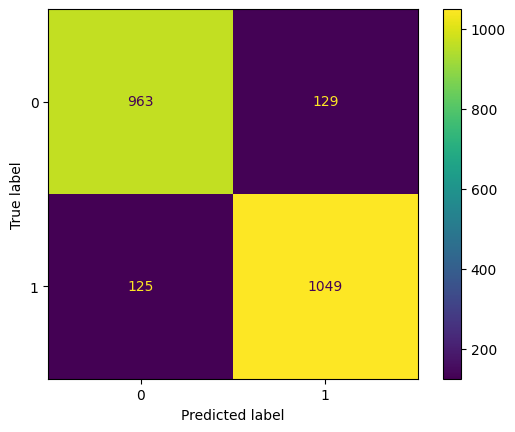

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

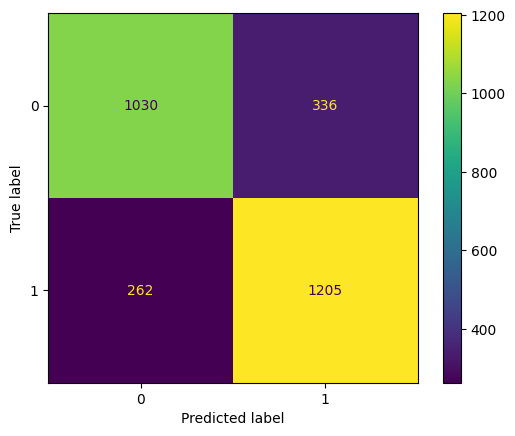

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

In [58]:
X = ATT2.drop("abuso", axis=1)
y = ATT2.abuso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
###### MLP
mlp = MLPClassifier()

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_train)

print("Ac: %.2f" % accuracy_score(y_train, y_pred))
print("precision_score: %.2f" % precision_score(y_train, y_pred))
print("recall_score: %.2f" % recall_score(y_train, y_pred))
print("f1_score: %.2f" % f1_score(y_train, y_pred))
print("Kappa: %.2f" % cohen_kappa_score(y_train, y_pred))
print("ROC: %.2f" % roc_auc_score(y_train, y_pred))

y_pred = mlp.predict(X_test)

print("Ac: %.2f" % accuracy_score(y_test, y_pred))
print("precision_score: %.2f" % precision_score(y_test, y_pred))
print("recall_score: %.2f" % recall_score(y_test, y_pred))
print("f1_score: %.2f" % f1_score(y_test, y_pred))
print("Kappa: %.2f" % cohen_kappa_score(y_test, y_pred))
print("ROC: %.2f" % roc_auc_score(y_test, y_pred))



Ac: 0.52
precision_score: 0.52
recall_score: 1.00
f1_score: 0.68
Kappa: 0.00
ROC: 0.50
Ac: 0.52
precision_score: 0.52
recall_score: 1.00
f1_score: 0.68
Kappa: -0.00
ROC: 0.50


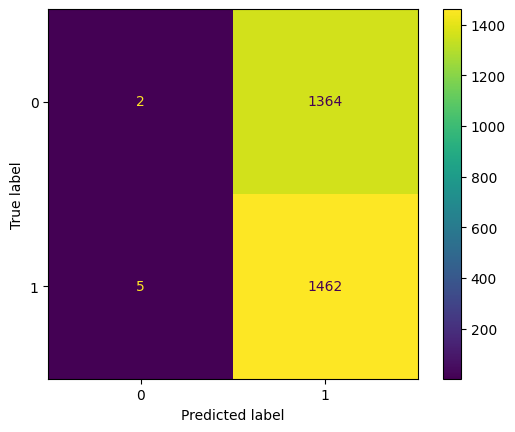

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

Verificar a normalidade dos dados...

In [78]:
from scipy import stats
#stat, p_value = stats.wilcoxon(KNN,CART)
#stat, p_value = stats.wilcoxon(KNN,MLP)
#stat, p_value = stats.wilcoxon(MLP,CART)
#stat, p_value = stats.wilcoxon(KNN2,CART2)
#stat, p_value = stats.wilcoxon(KNN2,MLP2)
stat, p_value = stats.wilcoxon(MLP2,CART2)

print('Statistics=%.0f, p=%.13f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=2, p=0.0937500000000
Do not Reject Null Hypothesis (No significant difference between two samples)


**Notas**

In [59]:
notas = pd.read_csv("/content/drive/MyDrive/ADA/TESE/game.csv",delimiter=r";")

In [60]:
notas.value_counts('Etnia')

Etnia
0.0    87
1.0    44
dtype: int64

In [61]:
notas['Gain']=(notas['NotaPre']-notas['NotaPos'])/(1-notas['NotaPre']).astype(float)

In [62]:
notas=notas.astype(float)

In [63]:
notas.Gain.isnull().sum()

12

In [64]:
comabuso = notas[(notas['abuso']==1)]
semabuso = notas[(notas['abuso']==0)]

comabusoCS1=comabuso[(comabuso['Turma']==1)]
comabusoCS2=comabuso[(comabuso['Turma']==2)]

semabusoCS1=semabuso[(semabuso['Turma']==1)]
semabusoCS2=semabuso[(semabuso['Turma']==2)]

In [78]:
comabuso = notas[(notas['abuso']==1)]
semabuso = notas[(notas['abuso']==0)]

comabuso1=comabuso[(comabuso['Etnia']==1)]
comabuso0=comabuso[(comabuso['Etnia']==0)]

semabuso1=semabuso[(semabuso['Etnia']==1)]
semabuso0=semabuso[(semabuso['Etnia']==0)]

In [81]:
comabuso = notas[(notas['abuso']==1)]
semabuso = notas[(notas['abuso']==0)]

comabuso1=comabuso[(comabuso['Sexo']==1)]
comabuso0=comabuso[(comabuso['Sexo']==2)]

semabuso1=semabuso[(semabuso['Etnia']==1)]
semabuso0=semabuso[(semabuso['Etnia']==0)]

In [74]:
comabuso = notas[(notas['abuso']==1)]
semabuso = notas[(notas['abuso']==0)]

comabuso1=comabuso[(comabuso['Faixa']==1)]
comabuso2=comabuso[(comabuso['Faixa']==2)]
comabuso3=comabuso[(comabuso['Faixa']==3)]


In [ ]:
comabuso.Gain

In [67]:
from scipy import stats

shapiro_test = stats.shapiro(notas['Gain'])
shapiro_test

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
notas.info()

In [68]:
# Importa as bibliotecas
import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [69]:
from scipy.stats import mannwhitneyu
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
stat, p_value = mannwhitneyu(comabusoCS2['Gain'],semabusoCS['Gain'])
print('Statistics=%.3f, p=%.13f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=305.000, p=0.2243500705761
Do not Reject Null Hypothesis (No significant difference between two samples)


In [82]:
stat, p_value = mannwhitneyu(comabuso1['freq'],comabuso0['freq'])
print('Statistics=%.3f, p=%.13f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=996.500, p=0.0312869651396
Reject Null Hypothesis (Significant difference between two samples)


In [82]:
notas

,idStudent,Turma,D01,D02,D03,D04,D05,D06,D07,D08,...,NotaPre,Inter1,Inter2,NotaPos,Intervencao,Gain,Sexo,Faixa,Etnia,abuso
0,2.0,1.0,5.0,5.0,5.0,2.0,4.0,2.0,2.0,5.0,...,87.0,45.0,90.0,97.0,68.0,0.116279,1.0,1.0,1.0,0.0
1,4.0,1.0,2.0,5.0,5.0,2.0,4.0,3.0,2.0,5.0,...,26.0,38.0,95.0,77.0,67.0,2.040000,1.0,1.0,1.0,0.0
2,23.0,1.0,2.0,5.0,3.0,2.0,4.0,1.0,2.0,3.0,...,64.0,62.0,87.0,84.0,74.0,0.317460,1.0,2.0,0.0,0.0
3,39.0,1.0,5.0,4.0,4.0,1.0,4.0,1.0,2.0,5.0,...,23.0,64.0,92.0,62.0,78.0,1.772727,1.0,2.0,0.0,0.0
4,42.0,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,...,25.0,89.0,74.0,85.0,82.0,2.500000,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,144.0,2.0,1.0,3.0,3.0,4.0,1.0,3.0,1.0,4.0,...,38.0,84.0,57.0,79.0,70.0,1.108108,2.0,1.0,0.0,1.0
127,145.0,2.0,1.0,3.0,4.0,4.0,1.0,3.0,5.0,4.0,...,33.0,95.0,77.0,52.0,86.0,0.593750,2.0,1.0,0.0,1.0
128,146.0,2.0,3.0,1.0,5.0,2.0,1.0,1.0,2.0,3.0,...,33.0,95.0,14.0,44.0,8.0,0.343750,2.0,1.0,0.0,1.0
129,147.0,2.0,3.0,1.0,4.0,5.0,3.0,4.0,1.0,1.0,...,89.0,2.0,35.0,64.0,19.0,-0.284091,2.0,2.0,0.0,1.0


In [15]:
comabuso.value_counts('Etnia')

Etnia
0.0    72
1.0    31
dtype: int64

In [16]:
notas.value_counts('Etnia')

Etnia
0.0    87
1.0    44
dtype: int64

In [40]:
belif = notas[['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','abuso']]

In [41]:
correlacao_spearman, p_valor = stats.pearsonr(belif['abuso'],belif['D12'])

In [42]:
print(f'Correlação de Spearman: {correlacao_spearman}')
print(f'P-valor: {p_valor}')

Correlação de Spearman: -0.3435263511865098
P-valor: 5.8916570852017576e-05


In [43]:
correlation = belif.corr()

In [44]:
correlation

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,abuso
D01,1.000000,0.140267,0.131537,-0.164099,-0.049277,0.092618,0.106144,0.173793,0.089023,0.187822,-0.137116,-0.110918,-0.202221,0.157033,0.205913
D02,0.140267,1.000000,0.303670,-0.342552,0.009910,-0.053916,0.027857,0.135980,-0.059667,-0.166130,-0.057579,-0.096123,-0.211491,-0.165412,0.304903
D03,0.131537,0.303670,1.000000,-0.318276,0.009881,0.002658,-0.040659,0.327230,-0.097735,-0.033804,-0.162616,-0.071642,-0.241339,0.036211,0.398788
D04,-0.164099,-0.342552,-0.318276,1.000000,-0.014033,0.030156,0.044358,-0.358357,0.082545,0.032955,0.198596,0.155195,0.353778,-0.037753,-0.447240
D05,-0.049277,0.009910,0.009881,-0.014033,1.000000,0.070199,0.232818,-0.056326,0.170380,-0.121554,0.044888,-0.015845,0.019143,0.133737,-0.031528
D06,0.092618,-0.053916,0.002658,0.030156,0.070199,1.000000,0.368005,0.041577,0.250656,-0.153945,-0.074929,0.098075,-0.006620,0.125878,0.079247
D07,0.106144,0.027857,-0.040659,0.044358,0.232818,0.368005,1.000000,-0.017448,0.214522,-0.143464,-0.020623,0.262063,0.083875,0.345630,0.046955
D08,0.173793,0.135980,0.327230,-0.358357,-0.056326,0.041577,-0.017448,1.000000,-0.219399,-0.006194,-0.392329,-0.153108,-0.474912,0.047675,0.587717
D09,0.089023,-0.059667,-0.097735,0.082545,0.170380,0.250656,0.214522,-0.219399,1.000000,-0.007562,0.246917,0.294928,0.213899,0.202382,-0.355108
D10,0.187822,-0.166130,-0.033804,0.032955,-0.121554,-0.153945,-0.143464,-0.006194,-0.007562,1.000000,-0.002884,0.019859,0.060909,0.110901,-0.033670


In [48]:
correlation.to_excel('correlation-belief.xlsx')